In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# somme cummulée
data = np.random.normal(0, 1, 100)

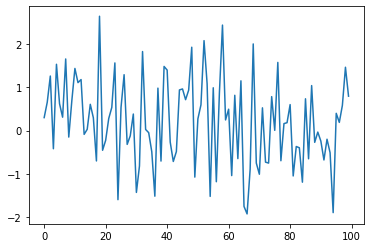

In [ ]:
plt.plot(data)

In [ ]:
data[:5]

array([ 0.29908879,  0.65360328,  1.25906503, -0.41982958,  1.53038372])

In [ ]:
np.cumsum(data)[:5]

array([0.29908879, 0.95269207, 2.21175709, 1.79192751, 3.32231123])

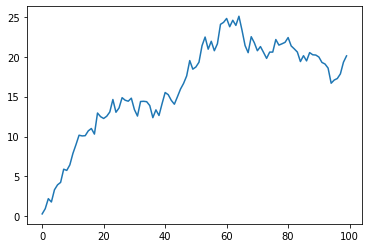

In [ ]:
plt.plot(np.cumsum(data))

In [ ]:
energy = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [ ]:
energy.shape

(4383, 5)

In [ ]:
energy.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
3670,2016-01-19,1672.320,169.572,20.782,190.354
628,2007-09-21,1417.439,NaN,NaN,NaN
470,2007-04-16,1363.121,NaN,NaN,NaN
33,2006-02-03,1577.786,NaN,NaN,NaN
971,2008-08-29,1376.338,NaN,NaN,NaN


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [ ]:
energy['Date']

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
           ...    
4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: Date, Length: 4383, dtype: object

In [ ]:
energy['Date'] = pd.to_datetime(energy['Date'])

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [ ]:
energy = energy.set_index('Date')

In [ ]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
energy.isnull().mean()

Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
dtype: float64

In [ ]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
energy.index[:5].year

Int64Index([2006, 2006, 2006, 2006, 2006], dtype='int64', name='Date')

In [ ]:
energy.index[:5].month

Int64Index([1, 1, 1, 1, 1], dtype='int64', name='Date')

In [ ]:
energy.index[:5].day

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Date')

In [ ]:
energy.index[:5].day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

In [ ]:
energy['Year'] = energy.index.year

In [ ]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


In [ ]:
energy.Year.value_counts()

2016    366
2012    366
2008    366
2015    365
2011    365
2007    365
2014    365
2010    365
2006    365
2017    365
2013    365
2009    365
Name: Year, dtype: int64

In [ ]:
energy['Month'] = energy.index.month
energy['day_name'] = energy.index.day_name()

In [ ]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [ ]:
energy['is_weekend'] = energy.day_name.isin(["Sunday", "Saturday"])

In [ ]:
energy.day_name == 'Saturday' |   energy.day_name == 'Sunday'

In [ ]:
x = 2
if x == 5 or x ==9 or x == 12:
  pass

if x in [5, 9, 12]

In [ ]:
(energy.day_name == 'Saturday') &   (energy.day_name == 'Sunday')

Date
2006-01-01    False
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: day_name, Length: 4383, dtype: bool

In [ ]:
energy

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,False
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,False


In [ ]:
energy.Year.max()

2017

In [ ]:
energy.loc["2016-12-23": "2016-12-28"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-12-23,1415.811,395.296,16.111,411.407,2016,12,Friday,False
2016-12-24,1195.354,681.509,12.843,694.352,2016,12,Saturday,True
2016-12-25,1117.673,719.778,6.608,726.386,2016,12,Sunday,True
2016-12-26,1121.213,718.160,15.463,733.623,2016,12,Monday,False
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False


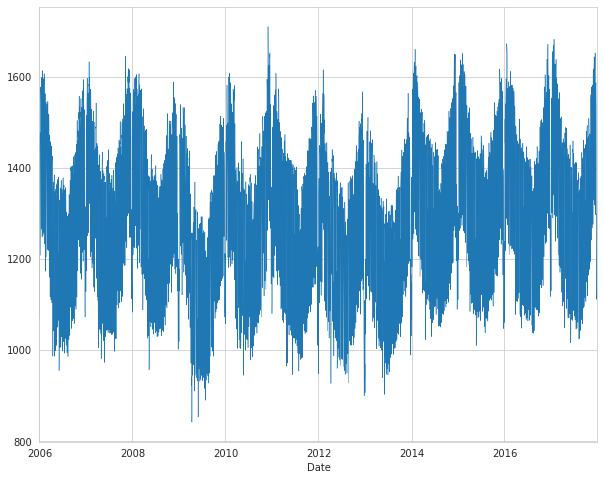

In [ ]:
sns.set_style("whitegrid")
energy['Consumption'].plot(linewidth=.5, figsize=(10, 8))

In [ ]:
# année avec le plus de consommation
energy.groupby('day_name').sum()['Consumption'].sort_values()

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

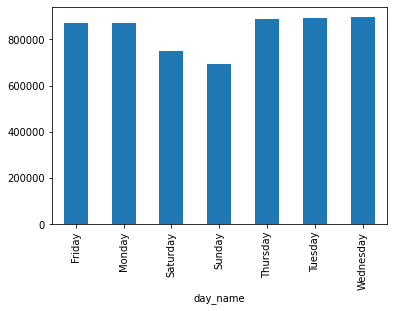

In [ ]:
# année avec le plus de consommation
energy.groupby('day_name').sum()['Consumption'].plot(kind='bar')

In [ ]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
energy.loc["2016-05"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-05-01,1078.602,179.870,147.931,327.801,2016,5,Sunday,True
2016-05-02,1405.185,81.868,197.183,279.051,2016,5,Monday,False
2016-05-03,1462.935,208.678,139.151,347.829,2016,5,Tuesday,False
2016-05-04,1430.136,84.961,174.185,259.146,2016,5,Wednesday,False
2016-05-05,1111.379,150.624,212.713,363.337,2016,5,Thursday,False
2016-05-06,1254.051,255.574,217.569,473.143,2016,5,Friday,False
2016-05-07,1149.938,315.362,215.963,531.325,2016,5,Saturday,True
2016-05-08,1072.653,390.557,217.819,608.376,2016,5,Sunday,True
2016-05-09,1403.845,360.421,207.427,567.848,2016,5,Monday,False


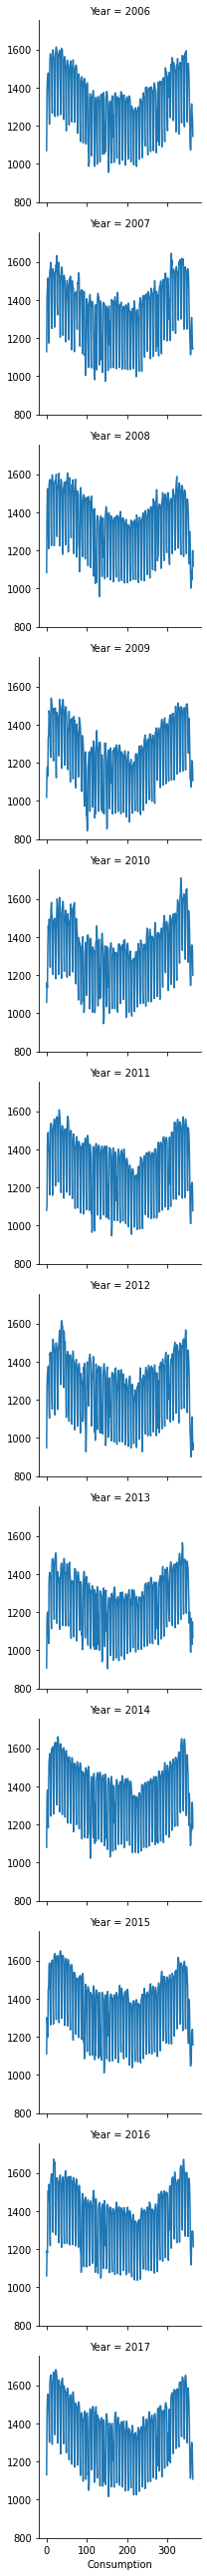

In [ ]:
grid = sns.FacetGrid(energy, row="Year")
grid.map(plt.plot,'Consumption')

In [ ]:
data_2016 = energy.loc['2016']

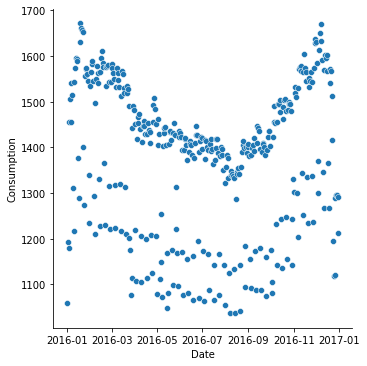

In [ ]:
sns.relplot(data =data_2016, x = data.index, y='Consumption')

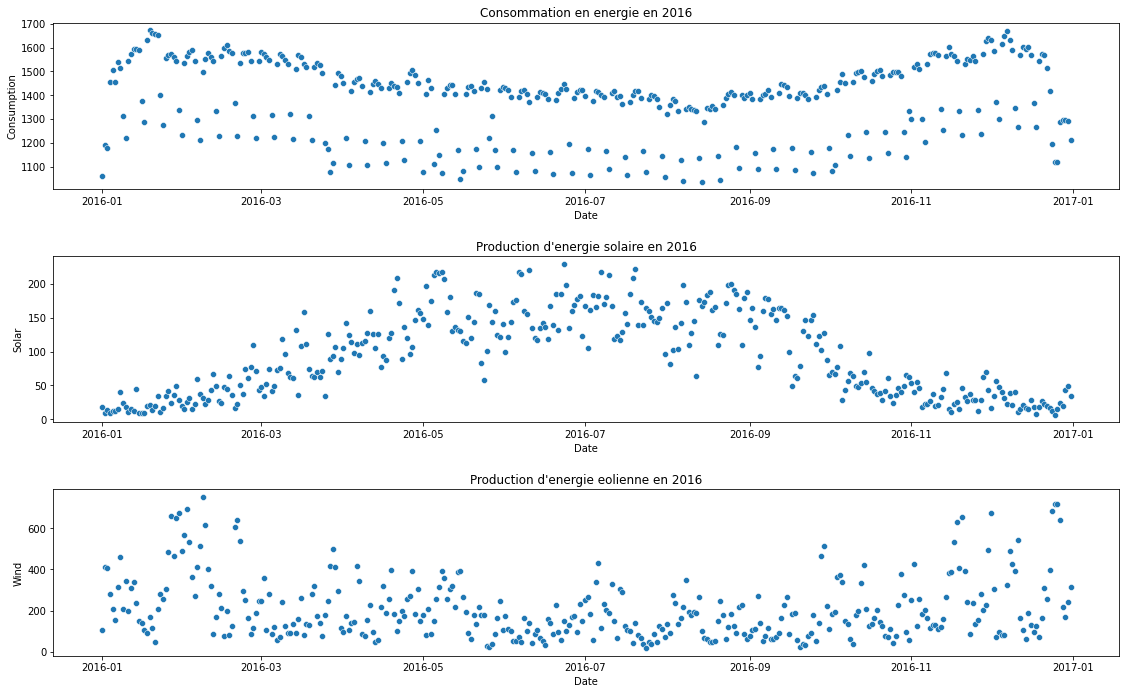

In [ ]:
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)
sns.scatterplot(data =data_2016, x = data.index, y='Consumption', ax=axes[0])
axes[0].set_title('Consommation en energie en 2016')
 
sns.scatterplot(data =data_2016, x = data.index, y='Solar',ax=axes[1])
axes[1].set_title("Production d'energie solaire en 2016")

sns.scatterplot(data =data_2016, x = data.index, y='Wind',ax=axes[2])
axes[2].set_title("Production d'energie eolienne en 2016")
fig.tight_layout(pad=2)

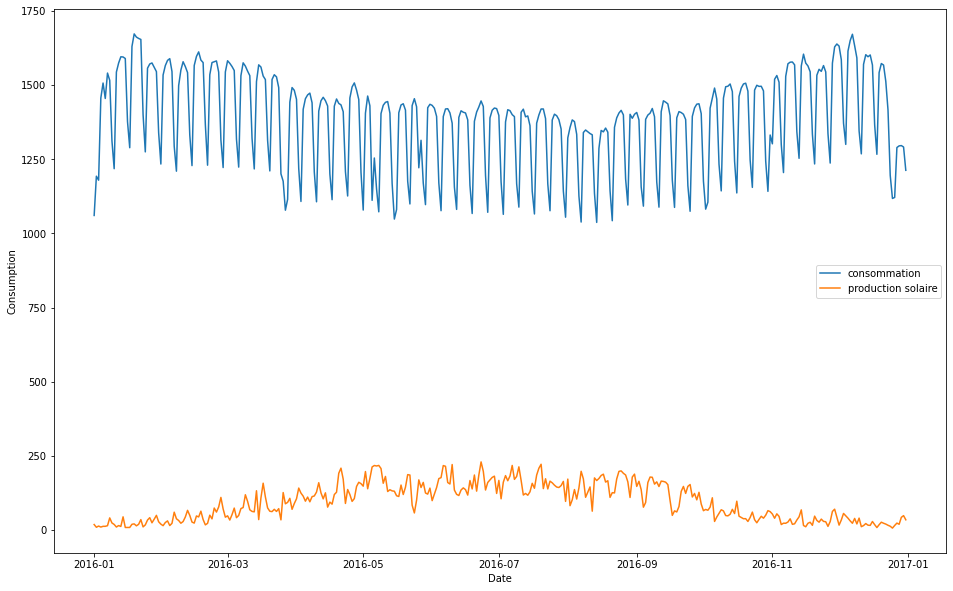

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10), nrows=1, ncols=1)
sns.lineplot(data =data_2016, x = data.index, y='Consumption', ax=ax, legend='brief', label='consommation')

 
sns.lineplot(data =data_2016, x = data.index, y='Solar',ax=ax, legend='brief', label='production solaire')


# sns.scatterplot(data =data_2016, x = data.index, y='Wind',ax=axes[2])
# axes[2].set_title("Production d'energie eolienne en 2016")
# fig.tight_layout(pad=2)

In [ ]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

# Group by Mois

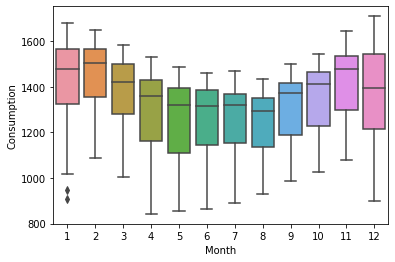

In [ ]:
sns.boxplot(data=energy, x="Month", y='Consumption')

In [ ]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

In [ ]:
energy["day_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

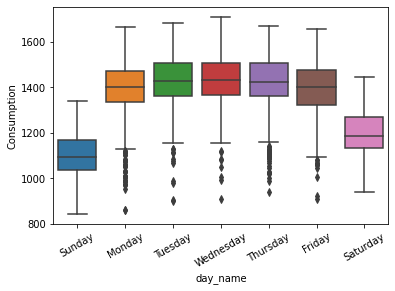

In [ ]:
g = sns.boxplot(data=energy, x="day_name", y='Consumption')
g.set_xticklabels(rotation=30, labels=energy["day_name"].unique())
plt.show()

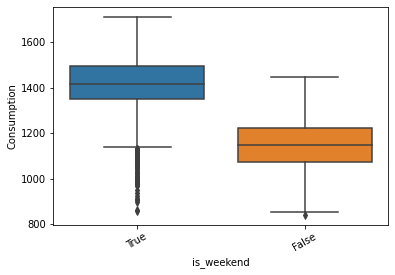

In [ ]:
g = sns.boxplot(data=energy, x="is_weekend", y='Consumption')
g.set_xticklabels(rotation=30, labels=energy["is_weekend"].unique())
plt.show()

In [ ]:
# Resampling
energy.shape

(4383, 8)

In [ ]:
energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('W').mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [ ]:
conso_par_mois = energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('M').sum()
conso_par_mois

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.70400,0.000,0.000,0.000
2006-02-28,41078.99300,0.000,0.000,0.000
2006-03-31,43978.12400,0.000,0.000,0.000
2006-04-30,38251.76700,0.000,0.000,0.000
2006-05-31,38858.14300,0.000,0.000,0.000
...,...,...,...,...
2017-08-31,40029.77368,5499.798,4602.808,10102.606
2017-09-30,40078.56092,6287.730,3079.291,9367.021
2017-10-31,42355.21893,12480.097,2130.557,14610.654


In [ ]:
 energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('Q').sum()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-03-31,130361.82100,0.000,0.000,0.000
2006-06-30,114363.36000,0.000,0.000,0.000
2006-09-30,116664.13500,0.000,0.000,0.000
2006-12-31,127679.22000,0.000,0.000,0.000
2007-03-31,129072.56700,0.000,0.000,0.000
2007-06-30,116357.37300,0.000,0.000,0.000
2007-09-30,119972.07200,0.000,0.000,0.000
2007-12-31,131229.83500,0.000,0.000,0.000
2008-03-31,131525.92900,0.000,0.000,0.000
